In [0]:
cd /content/

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
%matplotlib inline

In [0]:
df = pd.read_csv('/content/data_source.csv')
print("Total records = ", len(df))
df.head()

Total records =  64084


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


=> Total records = 64084


In [0]:
# chỉ chọn các cột quan tâm
df = df[["_unit_id", "please_select_the_gender_of_the_person_in_the_picture",
    "please_select_the_gender_of_the_person_in_the_picture:confidence", "image_url"]]
 
# rename the columns  đặt lại tên
df.columns = ["id", "gender", "confidence", "url"]
 
# only select the rows that has confidence of 1.0 
df = df[df["confidence"] == 1]
 
print("Total records = ", len(df))

Total records =  64075


=> Total records = 64075

In [0]:
df.groupby("gender").count()

,id,confidence,url
gender,,,
female,7364,7364,7364
male,47592,47592,47592
unsure,9119,9119,9119


![](https://)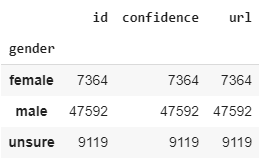

In [0]:
df_male = df[df["gender"] == "male"]
df_female = df[df["gender"] == "female"]
 
# to make both categories have equal number of samples
# we'll take the counts of the category that has lowest
# number of samples
min_samples = min(len(df_male), len(df_female))
 
# for indexing randomly
p = np.random.permutation(min_samples)
 
df_male = df_male.iloc[p]
df_female = df_female.iloc[p]
 
print("Total male samples = ", len(df_male))
print("Total female samples = ", len(df_female))
 
df = pd.concat([df_male, df_female])

Total male samples =  7364
Total female samples =  7364



male_samples = 7364 

female_sample = 7364

In [0]:
import os
import requests
from io import BytesIO
from PIL import Image
 
def download_images(df, data_dir="./data"):
    genders = df["gender"].unique()
    for g in genders:
        g_dir = "{}/{}".format(data_dir, g)
        if not os.path.exists(g_dir):
            os.makedirs(g_dir)
           
    for index, row in tqdm.tqdm_notebook(df.iterrows()):
        filepath = "{}/{}/{}.jpg".format(data_dir, row["gender"], row["id"])
        if os.path.exists(filepath):
            continue
        try:
            resp = requests.get(row["url"])
            im = Image.open(BytesIO(resp.content))
            im.save(filepath)
        except:
            print("Error while downloading %s" % row["url"])
 
DATA_DIR = "./data"
download_images(df, data_dir=DATA_DIR)  
 
# create train/test folder for each gender
import glob
 
TRAIN_DIR = DATA_DIR + "/train"
TEST_DIR = DATA_DIR + "/test"
 
for d in [TRAIN_DIR, TEST_DIR]:
    for g in df["gender"].unique():
        final_dir = "{}/{}".format(d, g)
        if not os.path.exists(final_dir):
            os.makedirs(final_dir)
 
from random import shuffle
import math
import shutil
 
split_ratio = 0.7 # we'll reserve 70% of the images for training set
 
def validate_and_move(files, target_dir):
    for f in tqdm.tqdm_notebook(files):
        # try to open the file to make sure that this is not corrupted
        try:
            im = Image.open(f)
            shutil.copy(f, target_dir)
        except:
            pass
#             os.remove(f)
 
for gender in df["gender"].unique():
    gender_dir = "{}/{}".format(DATA_DIR, gender)
    pattern = "{}/*.jpg".format(gender_dir)
    all_files = glob.glob(pattern)
    shuffle(all_files)
   
    train_up_to = math.ceil(len(all_files) * split_ratio)
    train_files = all_files[:train_up_to]
    test_files = all_files[train_up_to:]
   
   
    validate_and_move(train_files, TRAIN_DIR + "/" + gender)
    validate_and_move(test_files, TEST_DIR + "/" + gender)

Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/42-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/6369-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/33681-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/22264-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/24540-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/20464-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/67283-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/68352-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/31556-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/35122-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/46729-large
Error while downloading https://d1qb2nb5cznatu.cloudfront.net/users/49775-large
Error while downloading https://d1qb2nb5czna

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [0]:

TRAIN_DIR = "./data/train"
TEST_DIR = "./data/test"
IM_WIDTH = 198
IM_HEIGHT = 198

In [0]:
def plot_images(images,labels):
    n_cols = min(5,len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8,8))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

In [0]:
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, GlobalAvgPool2D
from keras.models import Model

In [0]:
img_input = Input(shape=(IM_HEIGHT,IM_WIDTH,3))
model = Conv2D(filters=32,kernel_size = 3)(img_input)
model = Activation("relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D()(model)

model = Conv2D(filters=64,kernel_size=3)(model)
model = Activation("relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D()(model)

model = Conv2D(filters=64,kernel_size=3)(model)
model = Activation("relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D()(model)

model = Conv2D(filters=128,kernel_size=3)(model)
model = Activation("relu")(model)
model = BatchNormalization()(model)
model = MaxPool2D()(model)

model= Conv2D(filters=128,kernel_size=3)(model)
model = Activation("relu")(model)
model = BatchNormalization()(model)
model = GlobalAvgPool2D()(model)

model = Dense(128)(model)
model = Activation("relu")(model)
model = BatchNormalization()(model)

model = Dense(1)(model)
model = Activation("sigmoid")(model)

In [0]:
model1 = Model(inputs=img_input,outputs=model)
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model1.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 198, 198, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_____________________________

In [0]:

from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              horizontal_flip=True
                             )
 
test_data_gen = ImageDataGenerator(rescale=1./255)
 
batch_size = 32
train_gen = train_data_gen.flow_from_directory(TRAIN_DIR,
                                               target_size=(IM_WIDTH, IM_HEIGHT),
                                               class_mode="binary",
                                               batch_size=batch_size)
test_gen = test_data_gen.flow_from_directory(TEST_DIR,
                                            target_size=(IM_WIDTH, IM_HEIGHT),
                                            class_mode="binary",
                                            batch_size=batch_size)

In [0]:
history = model1.fit_generator(train_gen,steps_per_epoch=len(train_gen.filenames)//batch_size,epochs=16)



Epoch 1/16
299/299 [==============================] - 95s 319ms/step - loss: 0.6376 - acc: 0.6500
Epoch 2/16
299/299 [==============================] - 89s 298ms/step - loss: 0.5234 - acc: 0.7333
Epoch 3/16
299/299 [==============================] - 87s 292ms/step - loss: 0.4696 - acc: 0.7682
Epoch 4/16
299/299 [==============================] - 86s 289ms/step - loss: 0.4395 - acc: 0.7837
Epoch 5/16
299/299 [==============================] - 86s 289ms/step - loss: 0.4083 - acc: 0.8067
Epoch 6/16
299/299 [==============================] - 86s 286ms/step - loss: 0.3883 - acc: 0.8168
Epoch 7/16
299/299 [==============================] - 85s 285ms/step - loss: 0.3581 - acc: 0.8323
Epoch 8/16
299/299 [==============================] - 85s 285ms/step - loss: 0.3382 - acc: 0.8450
Epoch 9/16
299/299 [==============================] - 85s 284ms/step - loss: 0.3128 - acc: 0.8520
Epoch 10/16
299/299 [==============================] - 85s 285ms/step - loss: 0.2981 - acc: 0.8639
Epoch 11/16
299/2

In [0]:
model1.save('GenderModel.h5')

In [0]:
from keras.models import load_model

model = load_model('GenderModel.h5')

In [0]:
TRAIN_DIR = "./data/train"
TEST_DIR = "./data/test"
IM_WIDTH = 198
IM_HEIGHT = 198

In [0]:

def plot_images(images,labels):
    n_cols = min(4,len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(15,15))
    
    for i in range(n_rows * n_cols):
        sp = fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
test_data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 32
test_gen = test_data_gen.flow_from_directory(TEST_DIR,
                                            target_size=(IM_WIDTH, IM_HEIGHT),
                                            class_mode="binary",
                                            batch_size=batch_size)

Found 4085 images belonging to 2 classes.


In [0]:
result = model.evaluate_generator(test_gen, steps=len(test_gen.filenames)//batch_size)

In [0]:
print("Test Accuracy :",end="")
print('%0.2f'%(result[1]*100) + " %")

Test Accuracy :86.76 %


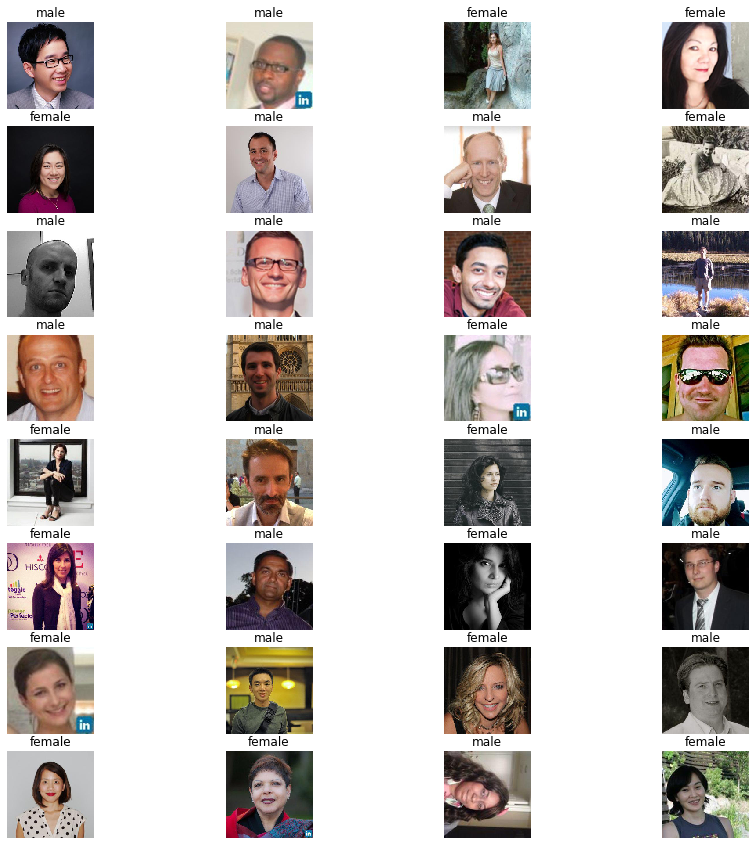

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
imgs,y_true = next(test_gen)
predictions = model.predict(imgs,batch_size=imgs.shape[0])
predictions_str = np.where(predictions.flatten()>0.5,"male","female")
plot_images(imgs,predictions_str)